# Heart attack data Exploration
## by Abdelrhman Samir Eltawagny

## Introduction
> This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = **no disease** and 1 = **disease**.
>
> - `age`
>
> - `sex` : 0 = Female and 1 = Male
>
> - `cp` : chest pain type (4 values)
>
> - `trestbps`: resting blood pressure
>
> - `chol` : serum cholestoral in mg/dl
>
> - `fbs` : fasting blood sugar > 120 mg/dl
>
> - `restecg` : resting electrocardiographic results (values 0,1,2)
>
> - `thalach` : maximum heart rate achieved
>
> - `exang` : exercise induced angina
>
> - `oldpeak` = ST depression induced by exercise relative to rest
>
> - `slope` : the slope of the peak exercise ST segment
>
> - `ca` : number of major vessels (0-3) colored by flourosopy
>
> - `thal`: 0 = normal; 1 = fixed defect; 2 = reversable defect




## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
#load data
df = pd.read_csv('heart.csv')

In [4]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
df.head(10)

(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
list = []
for i in df['age'] :
    if (i >= 29) & (i < 40) :
        list.append('Young Adults')
    elif(i >= 40) & (i < 60) :
        list.append('Middel-aged Adults')
    elif (i >= 60) :
        list.append('Old Adults')

In [6]:
se = pd.Series(list)
df['agegroup'] = se.values
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
agegroup     object
dtype: object

In [7]:
category_list = ['sex', 'cp', 'fbs', 'restecg','exang', 'slope',  'ca', 'thal', 'target' , 'agegroup']

for i in category_list:
    df[i] = df[i].astype('category')

df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
agegroup    category
dtype: object

### What is the structure of your dataset?

> There are 1025 patient in the dataset with 13 features (`sex`, `age` , `cp` , `trestbps` , `fbs` , `chol` , `restecg` , `thalach` , `exang` , `oldpeak` , `slope` , `ca` , `thal` , `target`). Most variables are categorical , but the variables AGE , trestbps , chol , thalach , oldpeak are numeric variable

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the heart attack of the patient in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that cp or chest pain type will have the strongest effect on each patint's heart attack . I also think that the other variables such as chol , trestbps , thalach and fbs will have effects on the heart attack

In [45]:
def label_graph(ticksfont , x_label , y_label , title_label , fontsize):
    
    plt.xticks(fontsize = ticksfont)
    plt.yticks(fontsize = ticksfont)

    plt.xlabel(x_label, fontsize = fontsize)
    plt.ylabel(y_label , fontsize = fontsize)
    plt.title(title_label, fontsize = fontsize)

## Univariate Exploration

I expect that cp or chest pain type will have the strongest effect on each patint's heart attack . I also think that the other variables such as slope , ca , and exang will have effects on the heart attack

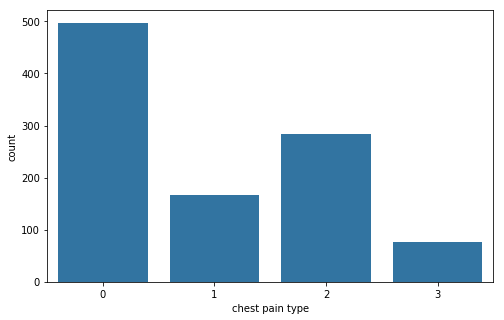

In [46]:
plt.figure(figsize=[8, 5])
default_color = sb.color_palette()[0]
sb.countplot(data = df , x = 'cp' , color = default_color)
plt.xlabel('chest pain type');

The number of patients who do not have chest pain or mild chest pain is large compared to the rest of the types

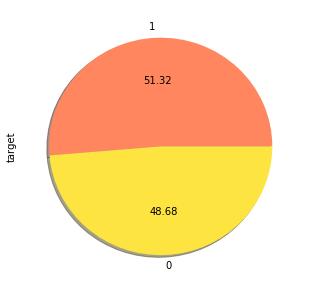

In [47]:
plt.figure(figsize=[5, 5])
mycolors = ["#FF865E", "#FEE440"]
df['target'].value_counts().plot(kind="pie", autopct="%.2f" , shadow = True , colors = mycolors);

The percentage between those with a heart attack and those without heart attacks is almost the same, but the number of patients in our data is greater, as shown in the previous chart.

Let's move to looking the distribution of numeric variables

### Blood pressure level
> According to **Centers for Disease Control and Preventation (CDC)** , high blood pressure is a major risk factor for heart disease. It is a medical condition that happens when the pressure of the blood in your arteries and other blood vessels is too high. The high pressure, if not controlled, can affect your heart and other major organs of your body, including your kidneys and brain.
> - Some health care professionals diagnose patients with high blood pressure if their blood pressure is consistently 140/90 mm Hg or higher.2 This limit is based on a guideline released in 2003, as seen in the table below.
>
>
> - Other health care professionals diagnose patients with high blood pressure if their blood pressure is consistently 130/80 mm Hg or higher.1 This limit is based on a guideline released in 2017, as seen in the table below.

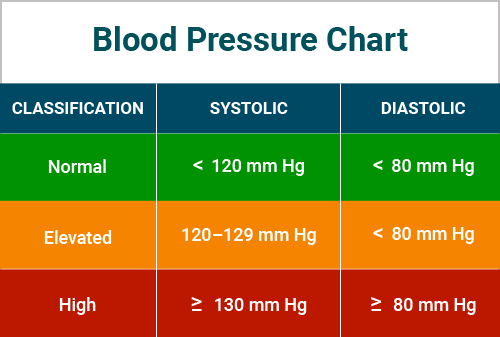

According to this image showing different blood pressure levels, we can ask some questions
- What is the blood pressure level for most patients?
- Are there people with high levels of cholesterol in the blood ?

Let's answer these questions by looking the distribution of `trestbps` variable

`trestbps` is an abbreviation for resting blood pressure

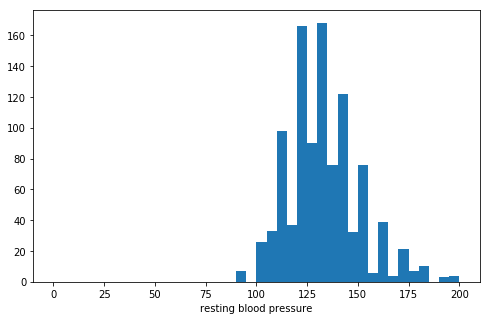

In [48]:
bins = np.arange(0 , df['trestbps'].max()+5 , 5)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'trestbps', bins = bins)
plt.xlabel('resting blood pressure')
plt.show()

The distribution of trestbps(resting blood pressure) variable looks roughly Gaussian distribution or Normal distribution

1.The blood pressure level for most patients is elevated leve (i.e .. betweent 120-129)

2.There are not a small number of patients suffering from high blood pressure, i.e. more than 130. These people will need to follow up with the attending physician so that this high pressure does not cause hardening of the heart arteries.

### Cholesterol level
> According to **Centers for Disease Control and Preventation (CDC)** , Unhealthy blood cholesterol levels. Cholesterol is a waxy, fat-like substance made by the liver or found in certain foods. Your liver makes enough for your body’s needs, but we often get more cholesterol from the foods we eat.
>
>If we take in more cholesterol than the body can use, the extra cholesterol can build up in the walls of the arteries, including those of the heart. This leads to narrowing of the arteries and can decrease the blood flow to the heart, brain, kidneys, and other parts of the body


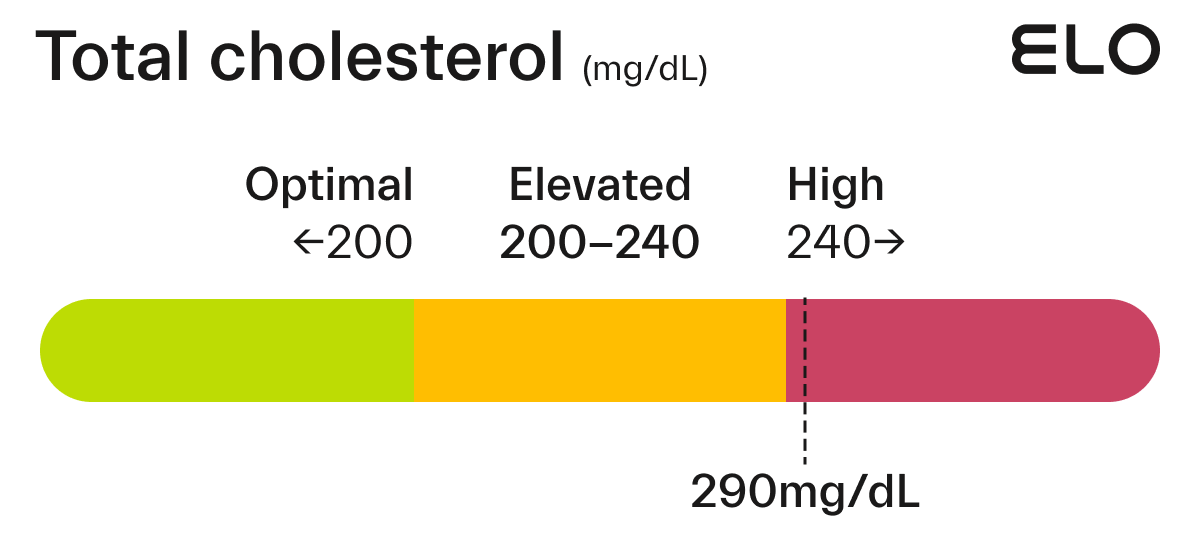

According to this image showing different cholesterol levels, we can ask some questions
- What is the cholesterol range for most patients?
- Are there people with high levels of cholesterol in the blood ?

Let's answer these questions by looking the distribution of `chol` (serum cholestoral in mg/dl) variable

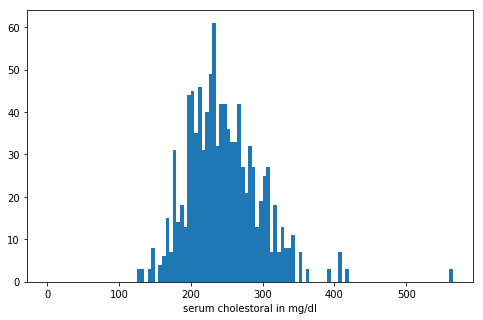

In [49]:
bins = np.arange(0 , df['chol'].max()+5 , 5)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'chol', bins = bins)
plt.xlabel('serum cholestoral in mg/dl')
plt.show()

Also , The distribution of `chol` (serum cholestoral in mg/dl) variable looks roughly **Gaussian distribution** or **Normal distribution** with some outliers. So we can answer the first question 

1-the range of cholestoral of patients between 200 and 270 that means that the most patients in elvated level 

2- There are some patients who suffer from very high levels of cholesterol, from 400 to nearly 600 mg/dl(outliers values). So these patients will need to follow up their health conditions with the attending physician, but this is not a cause for concern at all.

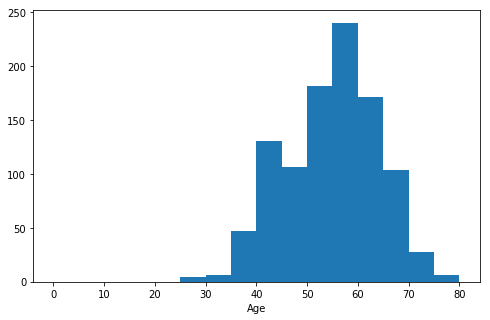

In [50]:
bins = np.arange(0 , df['age'].max()+5 , 5)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'age', bins = bins)
plt.xlabel('Age')
plt.show()

Also , The distribution of `age` variable looks roughly Gaussian distribution or Normal distribution and ةost of the patients' ages are between 50 and 65

**Question:** What if we wanted to know who has the greatest chance of having a heart attack, women or men?
This is a Bernoulli distribution

## Bernoulli Distribution
>This distribution is related to Binary classification . (i.e What is the probability that this person is sick or not? Or what is the probability that this customer will buy the product or not and so on)

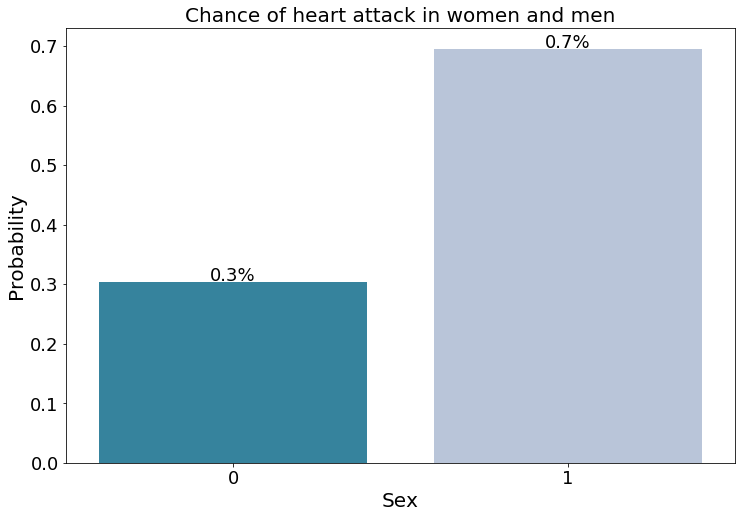

In [51]:
fig, ax = plt.subplots(figsize=(12,8))

heart_attack = df[df['target'] == 1]

# perform Bernoulli 
probabilities = df['sex'].value_counts(normalize=True)    
ax = sb.barplot(probabilities.index , probabilities.values , palette='PuBuGn_r')

# to write percentage on the top of bar 
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.001
    ax.annotate('{:.1f}%'.format(y), (x, y), ha='center' , fontsize = 18)


label_graph(18 ,'Sex' ,  'Probability'  , 'Chance of heart attack in women and men' ,  20 )

It's clear that men have a higher chance than women of having a heart attack

Now we can ask a question, which is why men are more likely to suffer a heart attack than women ?

Among the factors that we can look at if we are diagnosing a heart attack are:
- Blood pressure level 
- Cholesterol level 
- Blood sugar level
- Heart rate

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> All distributions of the numerical variables that we were interested in are distributions close to the normal distribution, so we will not need to perform any transformations, but we noticed that there are some outliers from 400 to nearly 600  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I did not make any transformations on the features that I explored, because those variables were distributed close to the normal distribution, so I did not need to perform any transformations on those variables

## Bivariate Exploration

> In this section, we will present the relationships between pairs of features that we were interested in in the previous section. Also, in this section, we will try to answer the question we asked at the end of the previous section, which is why men are more likely to have a heart attack than women.

In the previous section, we knew that blood pressure levels that are equal to or more than 130 are considered high and dangerous levels and can lead to a heart attack after that, so we will only be interested in the high levels of blood pressure for the words of men and women

In [52]:
high_blood_pressure = heart_attack[heart_attack['trestbps'] >= 130]
high_blood_pressure.sex.value_counts()

1    157
0    124
Name: sex, dtype: int64

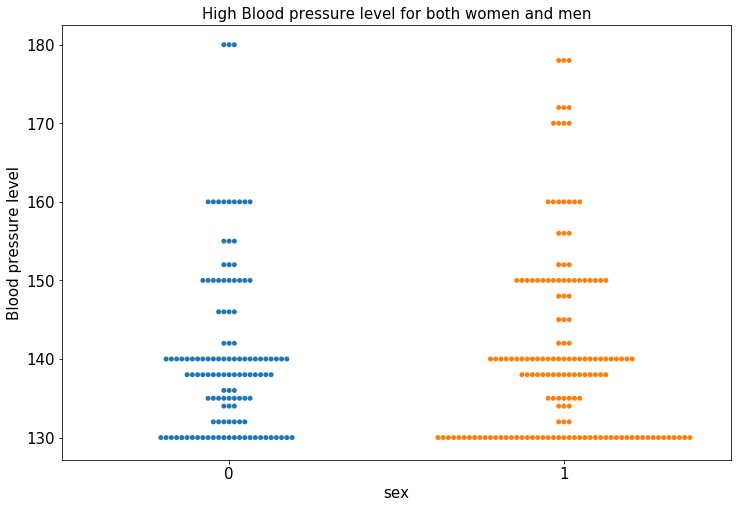

In [68]:
fig, ax = plt.subplots(figsize=(12,8))

# Generate plot
sb.swarmplot(x='sex' , y = 'trestbps' , data = high_blood_pressure)

#label axis
label_graph(15 ,'sex' ,  'Blood pressure level'  , 'High Blood pressure level for both women and men' ,  15 )

From the previous figure, women have a higher level of blood pressure than men, but the number of men who suffer from high blood pressure is greater than the number of women.

The high level of cholesterol in the blood does not quickly affect the heart, because the effect of cholesterol on the heart is in the long term, and therefore the high level of cholesterol does not cause us to worry at all. By consulting a doctor, taking treatment and eating healthy food, we can reduce this high level. Unlike high blood pressure, which can quickly affect the heart.So in this case, we will look at the high level of cholesterol for both patients and non-heart attack patients, because we will need to follow up on the health status of these people as well, in order to reduce these high levels of cholesterol.


In [54]:
#Calculating the number of people with high blood cholesterol
high_chol = df[df['chol'] > 240]
high_chol.groupby(['sex'])['target'].value_counts()

sex  target
0    1         123
     0          61
1    0         220
     1          99
Name: target, dtype: int64

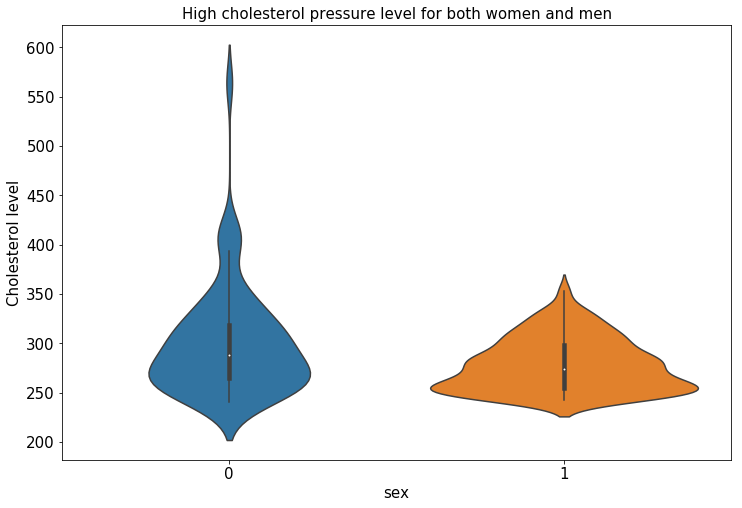

In [55]:
fig, ax = plt.subplots(figsize=(12,8))

# Generate plot
sb.violinplot(x='sex' , y = 'chol' , data = high_chol)

#label axis
label_graph(15 ,'sex' ,  'Cholesterol level'  , 'High cholesterol pressure level for both women and men' ,  15 )

More than half of the women have high cholesterol levels and More than half of the men have cholesterol levels < 240 

In the previous , we presented people with high blood pressure and high cholesterol, each one of them separately, what if we wanted to focus on people who suffer from high blood pressure and cholesterol, but they do not have a heart attack (high blood pressure and high cholesterol It can precipitate a heart attack)

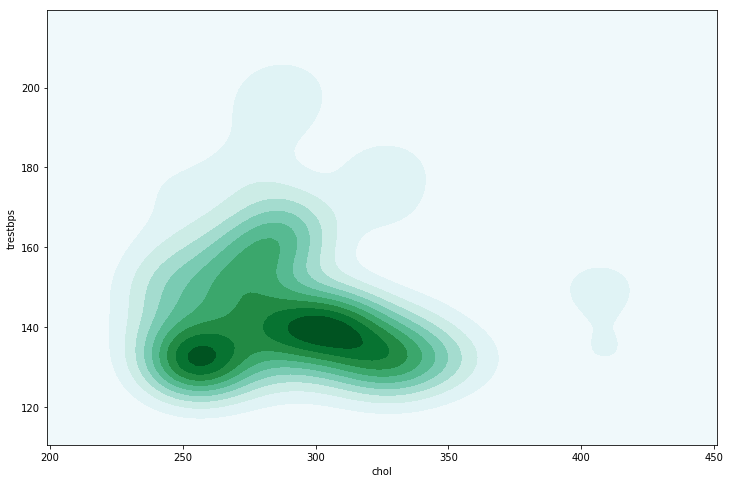

In [56]:
fig, ax = plt.subplots(figsize=(12,8))

high_chol_trestbps = df[(df['trestbps'] >= 130) & (df['chol'] >= 240) & (df['target'] == 0)]
sb.kdeplot(high_chol_trestbps.chol, high_chol_trestbps.trestbps, shade=True)

It is good to see that most people do not suffer from a very high blood pressure, as the dark areas mean more points (more pathological) and vice versa in the light areas, but we have a high level of cholesterol, we must follow the condition of these people well

### Blood suger level 
>`fbs` is a fasting blood sugar > 120 mg/dl
>
>According to **Centers for Disease Control and Preventation (CDC)** , high blood sugar can damage blood vessels and the nerves that control your heart. **fasting blood sugar test** measures your blood sugar after an overnight fast (not eating). 
> - A fasting blood sugar level of 99 mg/dL or lower is normal
> - 100 to 125 mg/dL indicates you have prediabetes
> - and 126 mg/dL or higher indicates you have diabetes.
>
>According to **National Institute of Diabetes and Digestive and Kideny Diseases (NIDDK)** , Having diabetes means you are more likely to develop heart disease

In [57]:
fasting_blood_sugar = heart_attack.groupby(['fbs'])['sex'].value_counts().unstack().fillna(0)
fasting_blood_sugar

sex,0,1
fbs,,
0,207,248
1,19,52


As we can see from this table there are :
- 19 women who have diabetes or prediabetes
- 52 men had diabetes or prediabetes

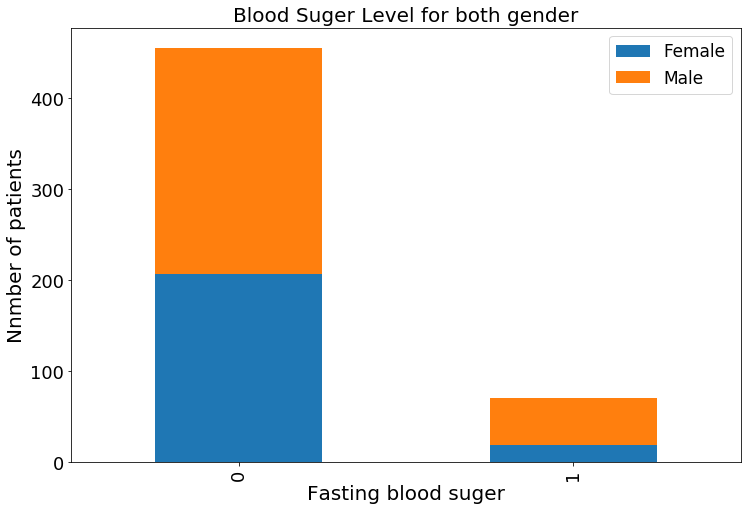

In [58]:
fasting_blood_sugar.plot(kind='bar', stacked=True , figsize=(12, 8))
label_graph(18 ,'Fasting blood suger' ,  'Nnmber of patients' , 'Blood Suger Level for both gender' ,  20 )
plt.legend(['Female' , 'Male'], fontsize = 17);

**Question:** Does the different levels of chest pain type affect the incidence of a heart attack?

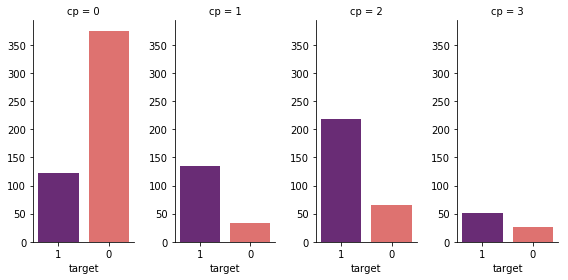

In [59]:
g = sb.FacetGrid(df, col="cp" , size = 4 , aspect=.5,hue='target',palette='magma_r')
g.map(sb.countplot, "target", order = df['target'].value_counts().index)

The number of patients with heart attack in all levels of chest pain is greater than the number of patients without heart attack except for level zero. This means that this variable has an effect on heart attack. We will explore whether this variable affects heart attack or not later

### Maximum heart rate

> Heart rate is a predictor of cardiovascular and all-cause mortality in the general population and in patients with cardiovascular disease. Increased resting heart rate multiplies risk and interferes at all stages of the cardiovascular disease continuum initiating from endothelial dysfunction and continuing via atherosclerotic lesion formation and plaque rupture to end-stage cardiovascular disease

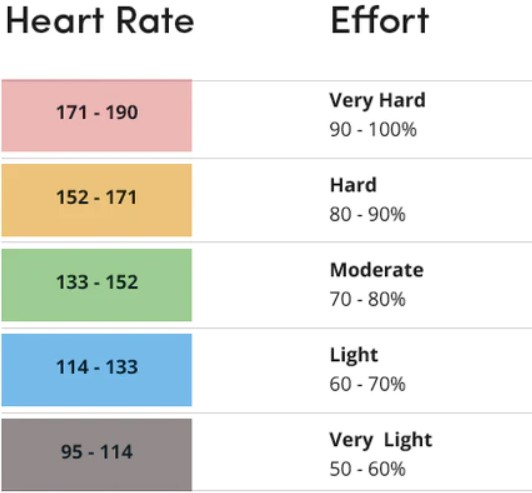

**Question:** What is the gender that has the highest heart rate?

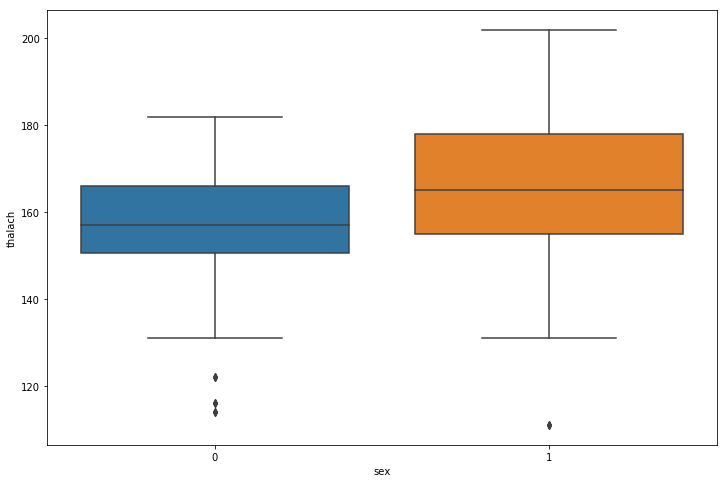

In [64]:
fig, ax = plt.subplots(figsize=(12,8))

# Generate plot
sb.boxplot(x='sex' , y = 'thalach' , data = high_blood_pressure);

Men have higher heart rates than women, so the median heart rate for men is greater than or equal to 170, and this is high heart rates.It is clear that the men make a very great effort.

Let's see the relationship between age group and maximum heart rate

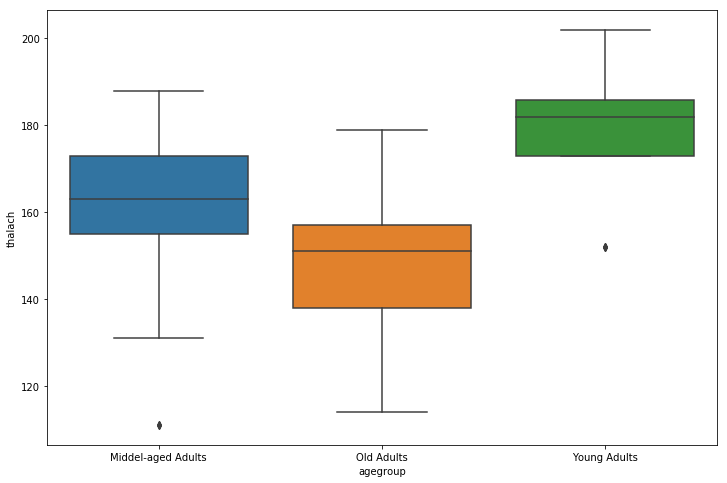

In [65]:
fig, ax = plt.subplots(figsize=(12,8))

# Generate plot
sb.boxplot(x='agegroup' , y = 'thalach' , data = high_blood_pressure);

The old people are the lowest age group in terms of heart rates. Their heart rates do not cause concern, unlike young people who have the highest heart rates. It is clear that they make a very great effort.These people will need to go to the doctor so that they are not at risk of infection or at risk of death due to their high rates

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I found, through my exploration of the features, that the greater the type of chest pain, the greater the risk of a heart attack, as in the first level of pain (the lowest level), the number of non-patients people was large, unlike the rest of the levels in which the number of people with a heart attack was higher.
We also found that men are more likely to have diabetes than women and also have high heart rate than women

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, I have noticed that there may be a relationship between age and heart rate, as the heart rate increases greatly in the event of a great effort. Therefore, I found that the age group from 29 to 39 years (young people) have a large heart rate ( It is possible that the nature of their workers requires them to exert a lot of effort. On the contrary, the elderly group (60 years and older) their heart rates do not cause concern (it is possible that they do not do any hard work and are always resting).

## Multivariate Exploration
In this section we will look at the age groups and see the levels of pressure, cholesterol and heart rate

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


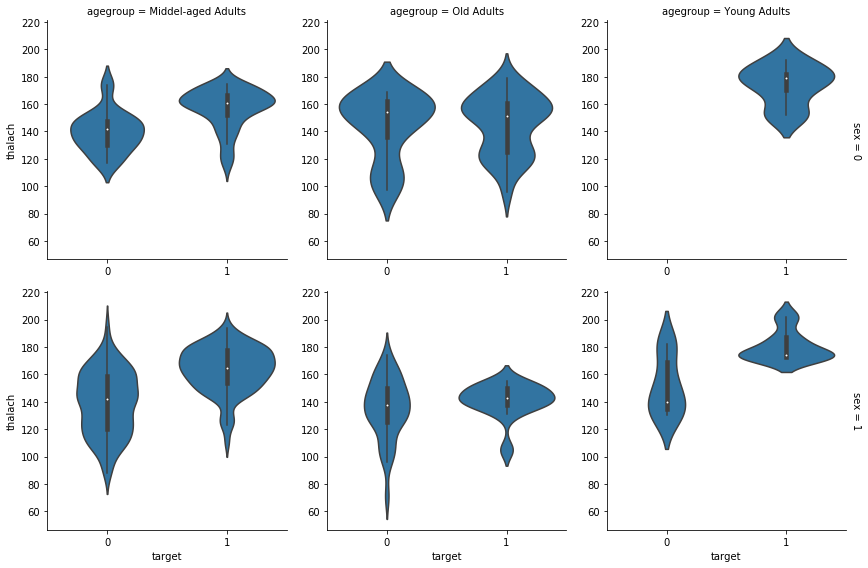

In [61]:
g = sb.FacetGrid(data = df, col = 'agegroup', row ='sex', size = 4 , margin_titles = True)
g.map(sb.violinplot, 'target', 'thalach');

There is a clear increase in the heart rate (more than 190) for the youth category compared to the rest of the other groups for both gender

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


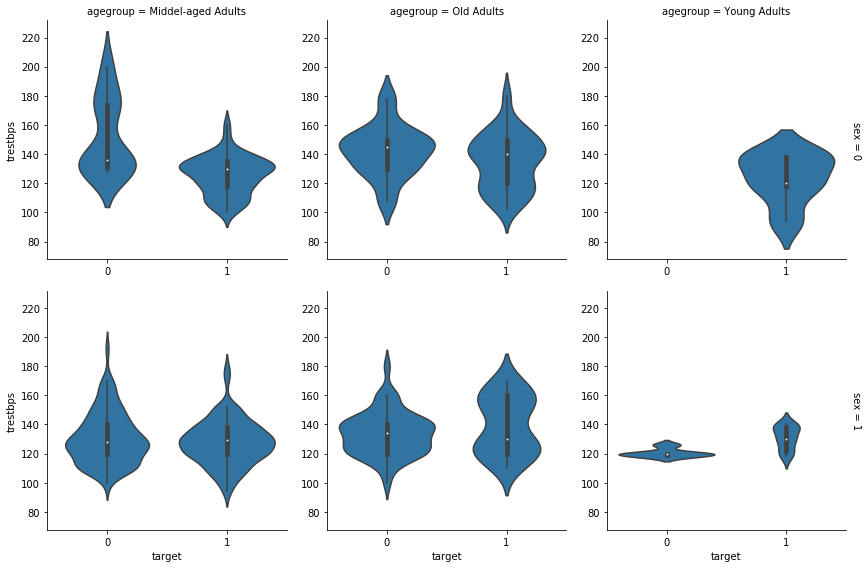

In [62]:
g = sb.FacetGrid(data = df, col = 'agegroup', row ='sex', size = 4 , margin_titles = True)
g.map(sb.violinplot, 'target', 'trestbps');

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


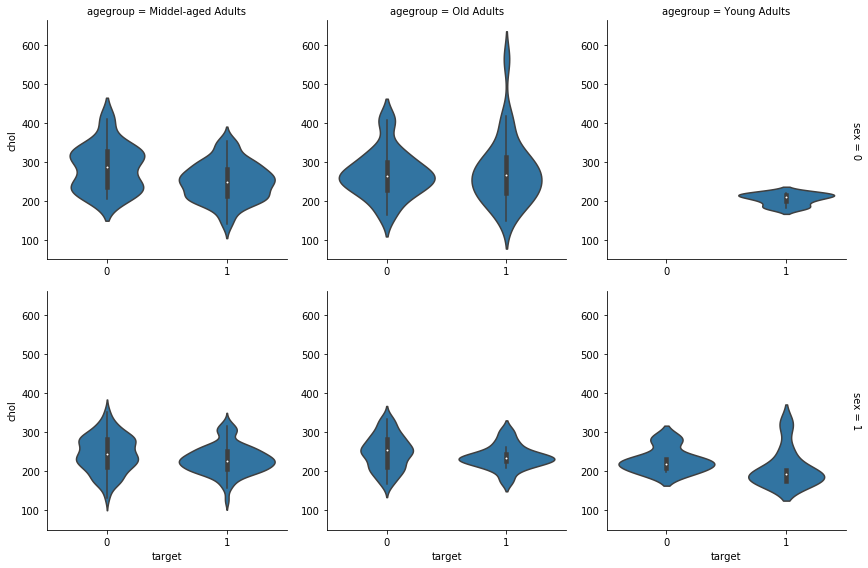

In [63]:
g = sb.FacetGrid(data = df, col = 'agegroup', row ='sex', size = 4 , margin_titles = True)
g.map(sb.violinplot, 'target', 'chol');

Women have higher cholesterol levels at all ages than men

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In this section, I tried to look at the different age groups and their relationship to influencing factors such as (blood pressure level - cholesterol level - heart rate), and I found that young people, whether women or men, have high blood pressure levels, and women also have high cholesterol levels.

### Were there any interesting or surprising interactions between features?

> There is something that attracted my attention and that is that most of the women in the youth category suffer from heart attacks and this is something that may cause us to worry a little and the need to look at this matter more carefully to find out all the reasons why most women in the youth category suffer from heart attacks

## Conclusions
> In the beginning, we presented the different levels of the type of chest pain, then we moved on to seeing the percentage of patients and non-heart attack sufferers. than we used Bernoulli distribution , to see which gender has the highest rate of heart attack, and by asking the question why men are more likely to have a heart attack than , we moved to the second section (Bivariate Exploration),To answer this question, we explored the level of blood pressure, the level of cholesterol, and the number of people with disease Diabetes, and at the end of this section, we saw the heart rate for each age group, and we found that the youth category has the highest heart rates, and in the last section(Multivariate Exploration), we wanted to see which age group for both women and men has high levels of blood pressure, cholesterol, and heart rate the heart